In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Data set Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/gdrive/MyDrive/Data science capestone 1/diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# check for duplicated rows

df.duplicated().sum()

3854

In [ ]:
# drop duplicates
df = df.drop_duplicates()
df.shape

(96146, 9)

In [ ]:
# check for null values in each column
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Count how many o and 1 are there in the diabetes column (show as persentage)

diabetes_counts = df['diabetes'].value_counts(normalize =True)

percent_0 = (diabetes_counts[0] / diabetes_counts.sum()) * 100
percent_1 = (diabetes_counts[1] / diabetes_counts.sum()) * 100

diabetes_counts = df['diabetes'].value_counts()

print(f"Percentage of patients without diabetes: {percent_0:.2f}%")
print(f"Percentage of patients with diabetes: {percent_1:.2f}%")

print(f"Number of patients without diabetes: {diabetes_counts[0]}")
print(f"Number of patients with diabetes: {diabetes_counts[1]}")

Percentage of patients without diabetes: 91.18%
Percentage of patients with diabetes: 8.82%
Number of patients without diabetes: 87664
Number of patients with diabetes: 8482


since our predicdictive value - if the patient is diabetes or non diabetes, the model that we are going to make may just predict the majority class to achieve high accuracy, but it won't generalize well.

Many machine learning algorithms allow us to assign different weights to classes. By giving higher weights to minority classes, we can penalize misclassifications of these classes more severely, encouraging the model to focus on them.

And we will avoid using accuracy alone as a performance metric, especially in imbalanced datasets. Metrics like precision, recall, F1-score, ROC-AUC, or PR-AUC are more informative

--

In [ ]:
# Get the list and number of unique values for each variable
unique_values = {column: df[column].unique() for column in df.columns}
unique_counts = {column: df[column].nunique() for column in df.columns}

unique_values, unique_counts

({'gender': array(['Female', 'Male', 'Other'], dtype=object),
  'age': array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
         32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
         72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
         73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
         19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
         11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
         22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
         61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
         48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
         35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
          1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
          0.32,  1.72,  1.48]),
  'hypertension': array([0, 1]),
  'heart_disease': array([1, 0]),
  'smoking_history': array(['never', 'No

In [ ]:
# percentage of different gender in the data set

gender_percentage = df['gender'].value_counts(normalize =True)
gender_counts = df['gender'].value_counts()

percent_0 = (gender_counts[0] / gender_counts.sum()) * 100
percent_1 = (gender_counts[1] / gender_counts.sum()) * 100
percent_2 = (gender_counts[2] / gender_counts.sum()) * 100

print(f"Percentage of female patients: {percent_0:.2f}%")
print(f"Percentage of male patients: {percent_1:.2f}%")
print(f"Percentage of other patients: {percent_2:.2f}%")
print()
print(f"Number of female patients: {gender_counts[0]}")
print(f"Number of male patients: {gender_counts[1]}")
print(f"Number of other patients: {gender_counts[2]}")

Percentage of female patients: 58.41%
Percentage of male patients: 41.57%
Percentage of other patients: 0.02%

Number of female patients: 56161
Number of male patients: 39967
Number of other patients: 18


In [ ]:
# Drop the 'other' value in the gender column because it represents 0.02% of the dataset

df = df.drop(df[df['gender'] == 'Other'].index)
df.shape

(96128, 9)

In [ ]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [ ]:
# Show how many people are smokers using the smoking_history column

smoking_counts = df['smoking_history'].value_counts()

print(f"Number of non-smokers: {smoking_counts['never']}")
print(f"Number of current smokers: {smoking_counts['current']}")
print(f"Number of No Info: {smoking_counts['No Info']}")
print(f"Number of ever smokers: {smoking_counts['ever']}")
print(f"Number of former smokers: {smoking_counts['former']}")
print(f"Number of not current: {smoking_counts['not current']}")



Number of non-smokers: 34395
Number of current smokers: 9197
Number of No Info: 32881
Number of ever smokers: 3997
Number of former smokers: 9299
Number of not current: 6359


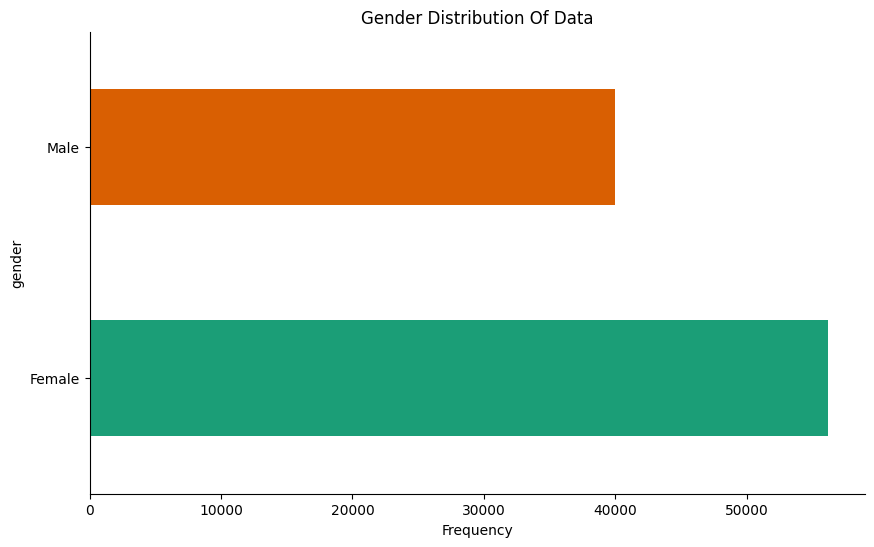

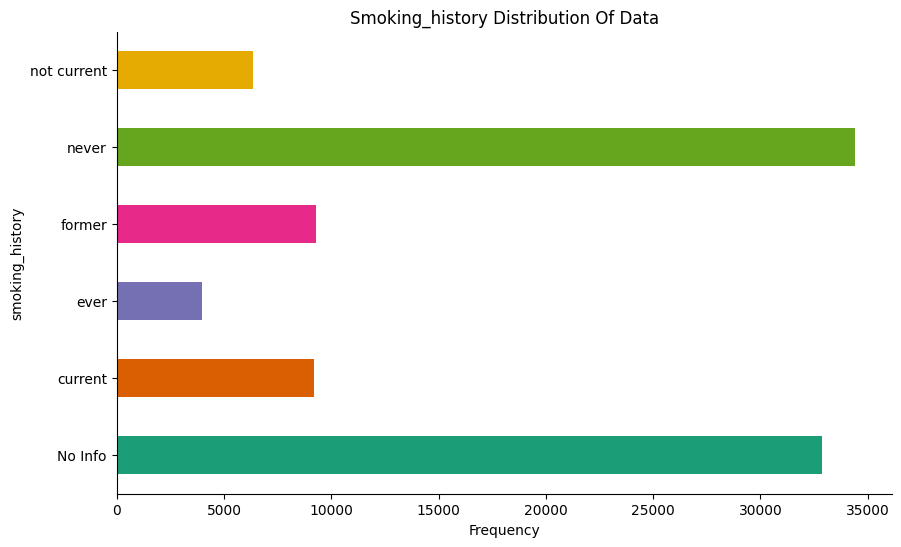

In [ ]:
# visualize distribution of categorical columns in data

categorical_columns = [column for column in df.columns if df[column].dtype == object]
numeric_columns =  [column for column in df.columns if df[column].dtype  != object]

categorical_columns

for column in categorical_columns:
  plt.figure(figsize=(10, 6))
  df.groupby(column).size().plot(kind='barh', color=sns.palettes.mpl_palette("Dark2"))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.title(column.capitalize() + " Distribution Of Data")
  plt.xlabel("Frequency")  # Add x-axis title here
  plt.show()
  print("\n" *5)

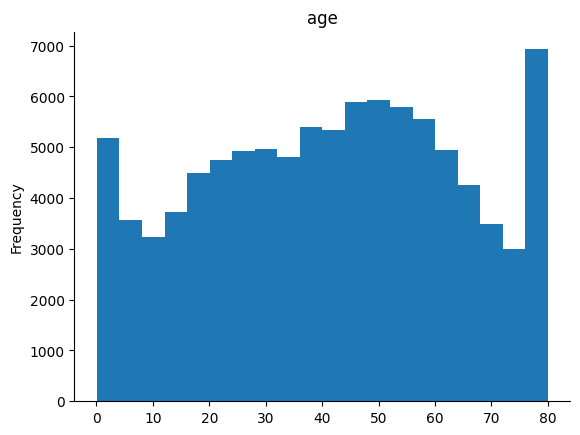

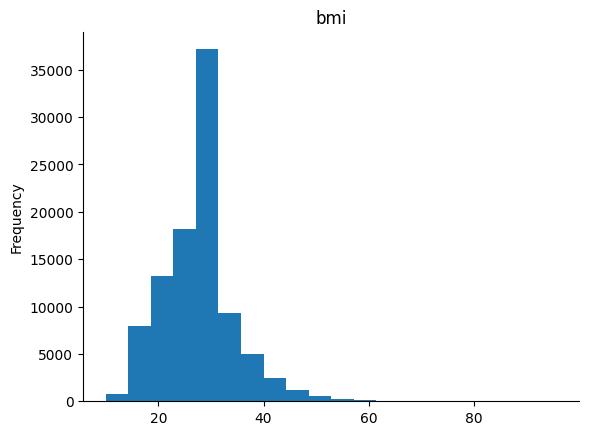

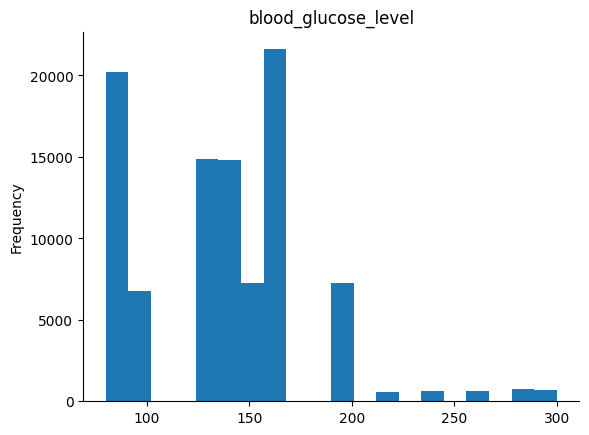

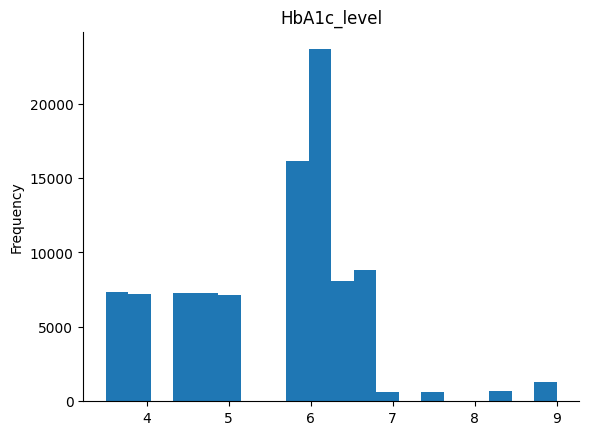

In [ ]:
#distribution of numeric

selected_columns = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

for column in selected_columns:
  df[column].plot(kind='hist', bins = 20, title=column)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.show()
  print("\n" *5)

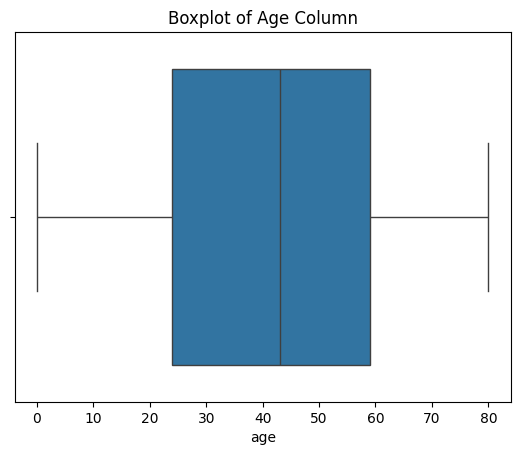

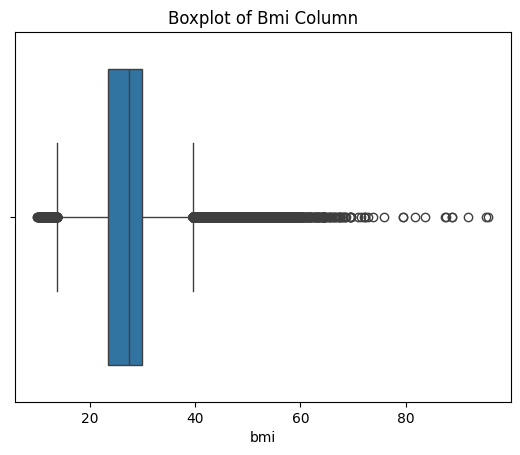

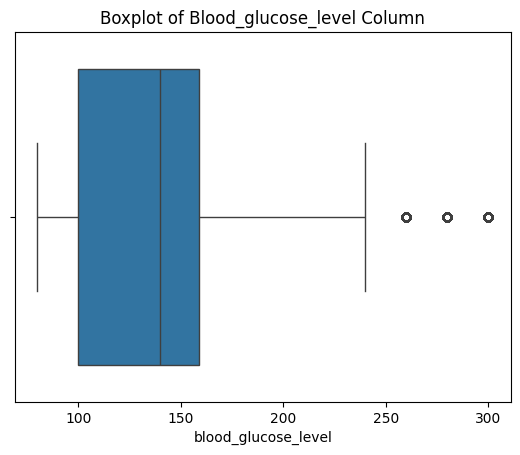

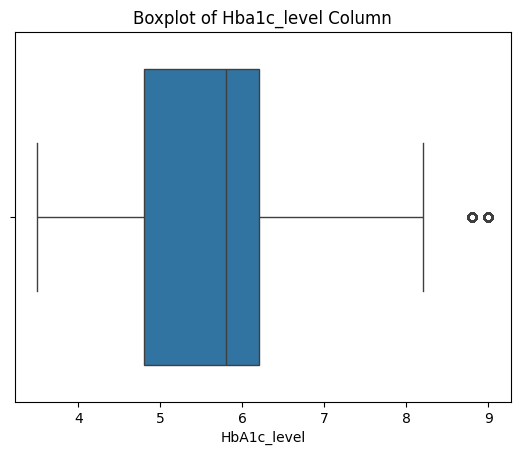

In [ ]:
# check for outliers in the columns
# Gnerate boxplots
for column in selected_columns:
  sns.boxplot(x=df[column])
  plt.title("Boxplot of " + column.capitalize() + " Column")
  plt.show()
  print("\n"*5)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to check for outliers
selected_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Function to count the number of outliers in each column using IQR method
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count the number of outliers for each selected column
outliers_count = {column: count_outliers(df, column) for column in selected_columns}
outliers_count

{'age': 0,
 'hypertension': 7461,
 'heart_disease': 3923,
 'bmi': 5354,
 'HbA1c_level': 1312,
 'blood_glucose_level': 2031,
 'diabetes': 8482}

In [ ]:
# descriptive statistics that summarize the central tendency, dispersion,

description = df[selected_columns].describe()
description

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_df = df[df['diabetes'].isin([1])]

In [ ]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


In [ ]:
diabetes_df = df[df['diabetes'].isin([ 1])]
diabetes_description = diabetes_df[selected_columns].describe()
diabetes_description

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.0
mean,60.925961,0.245933,0.149375,31.997755,6.934827,194.026173,1.0
std,14.545301,0.430664,0.356479,7.563494,1.076462,58.630047,0.0
min,3.000000,0.000000,0.000000,10.980000,5.700000,126.000000,1.0
25%,52.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.0
50%,62.000000,0.000000,0.000000,29.985000,6.600000,160.000000,1.0
75%,72.000000,0.000000,0.000000,35.940000,7.500000,240.000000,1.0
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.0


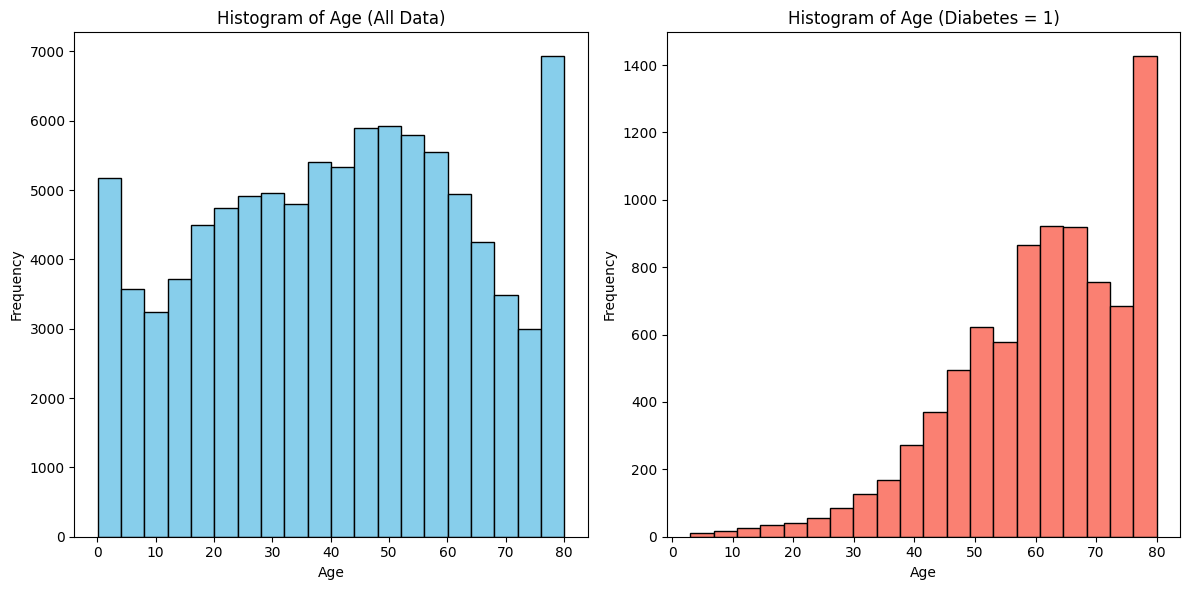

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Age (All Data)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 1
axs[1].hist(diabetes_df['age'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Age (Diabetes = 1)')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

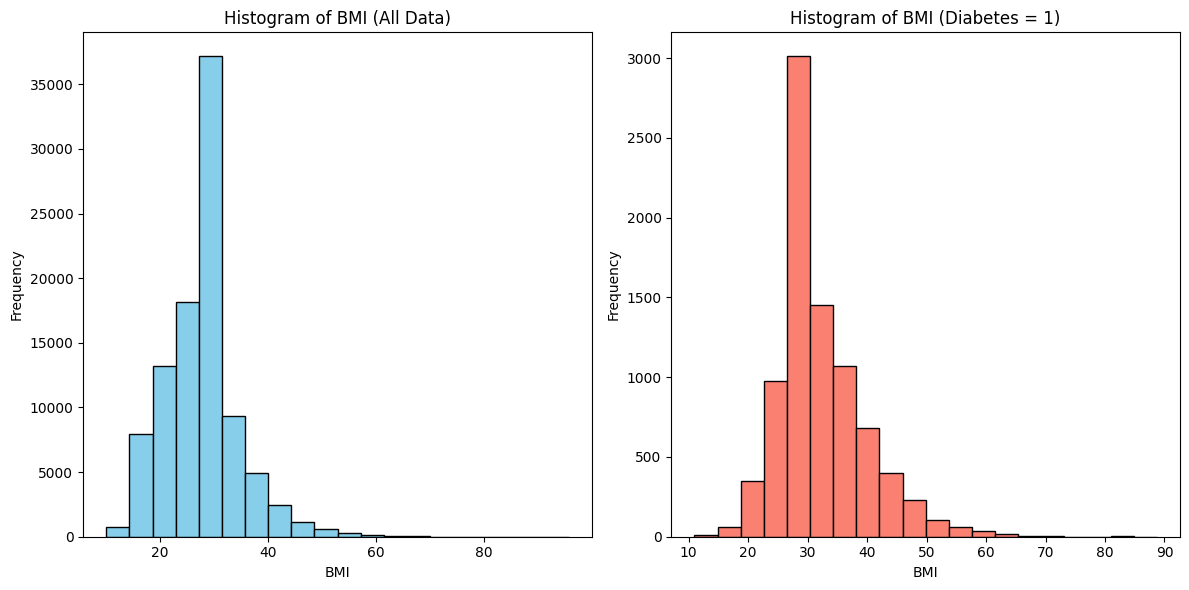

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['bmi'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of BMI (All Data)')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 0 or 1
axs[1].hist(diabetes_df['bmi'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of BMI (Diabetes = 1)')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

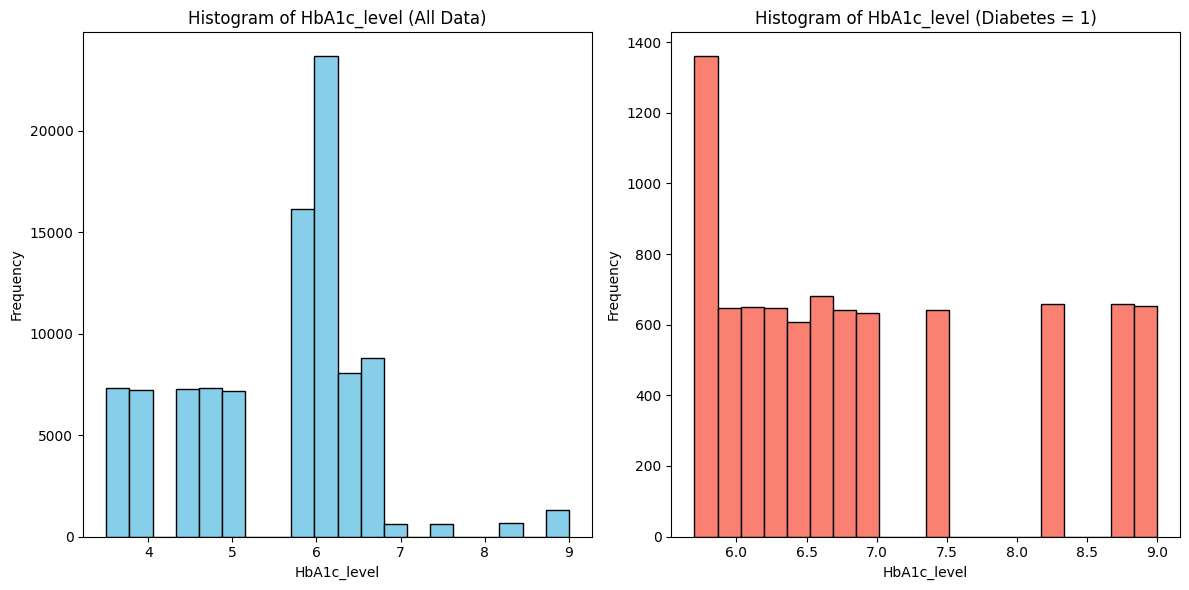

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['HbA1c_level'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of HbA1c_level (All Data)')
axs[0].set_xlabel('HbA1c_level')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 0 or 1
axs[1].hist(diabetes_df['HbA1c_level'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of HbA1c_level (Diabetes = 1)')
axs[1].set_xlabel('HbA1c_level')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

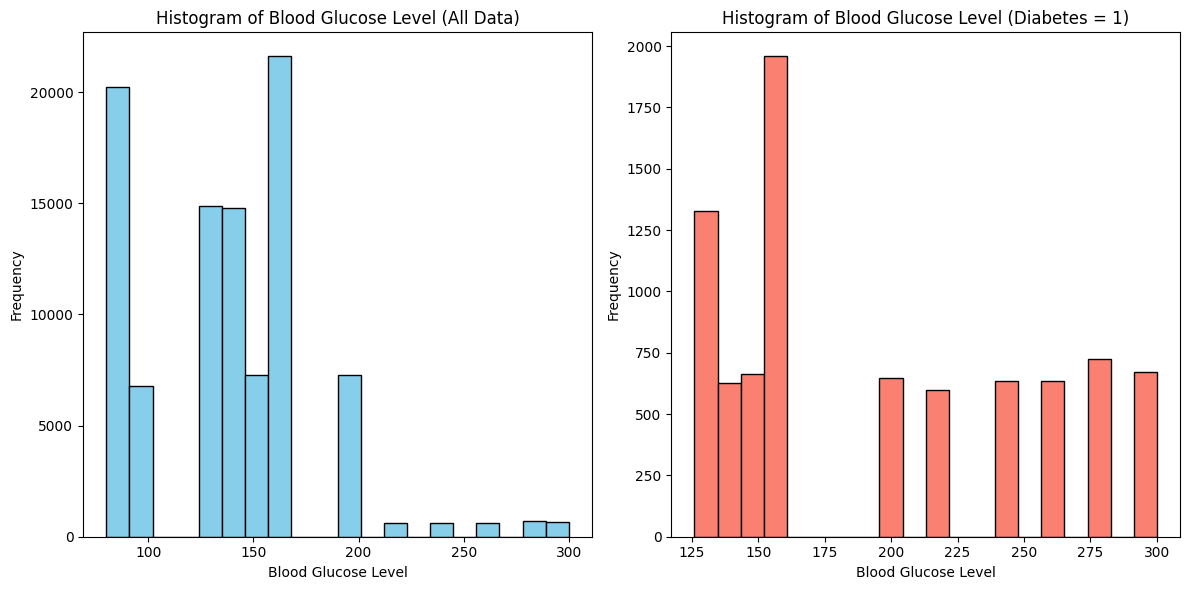

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['blood_glucose_level'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Blood Glucose Level (All Data)')
axs[0].set_xlabel('Blood Glucose Level')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 0 or 1
axs[1].hist(diabetes_df['blood_glucose_level'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Blood Glucose Level (Diabetes = 1)')
axs[1].set_xlabel('Blood Glucose Level')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

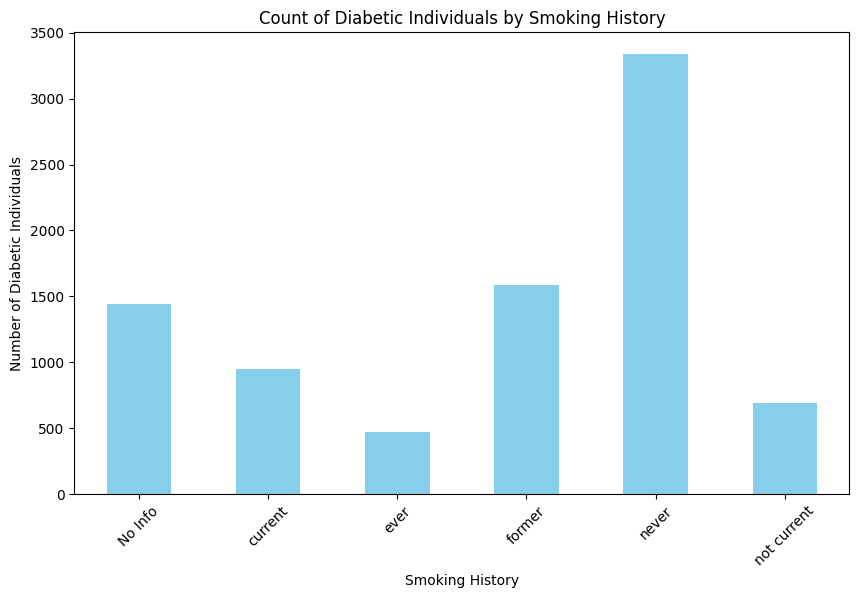

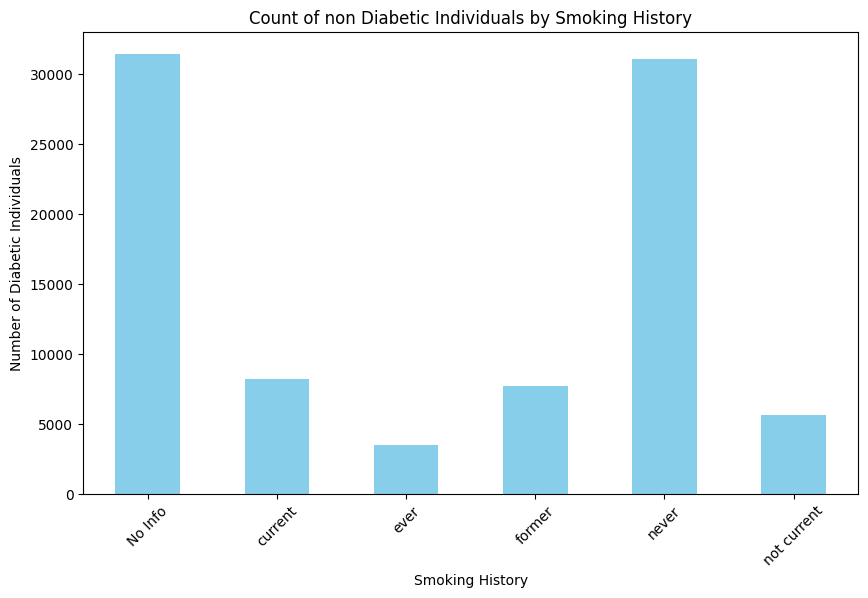

In [ ]:
# Filter the DataFrame for individuals with diabetes
diabetic_df = df[df['diabetes'] == 1]

# Group the filtered data by 'smoking_history' and count the number of diabetic individuals
smoking_diabetic_count = diabetic_df.groupby('smoking_history').size()

# Plot the data
plt.figure(figsize=(10, 6))
smoking_diabetic_count.plot(kind='bar', color='skyblue')
plt.title('Count of Diabetic Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Number of Diabetic Individuals')
plt.xticks(rotation=45)
plt.show()

# Filter the DataFrame for individuals with no diabetes
non_diabetic_df = df[df['diabetes'] == 0]

# Group the filtered data by 'smoking_history' and count the number of diabetic individuals
smoking_diabetic_count = non_diabetic_df.groupby('smoking_history').size()

# Plot the data
plt.figure(figsize=(10, 6))
smoking_diabetic_count.plot(kind='bar', color='skyblue')
plt.title('Count of non Diabetic Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Number of Diabetic Individuals')
plt.xticks(rotation=45)
plt.show()


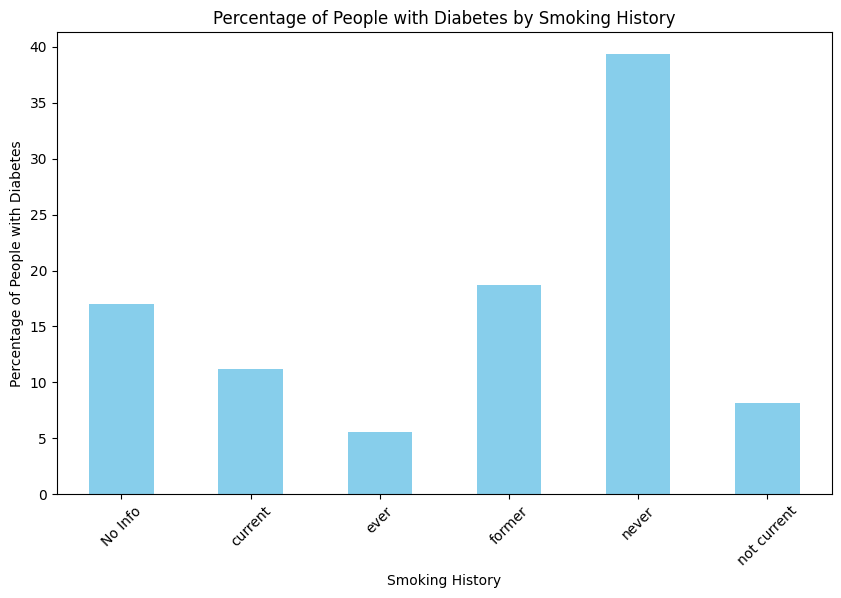

In [ ]:
# Calculate the total number of people with diabetes
total_diabetes = df['diabetes'].sum()

# Group the data by 'smoking_history' and calculate the percentage of people with diabetes in each category
smoking_diabetes_percentage = df.groupby('smoking_history')['diabetes'].sum() / total_diabetes * 100

# Plot the data
plt.figure(figsize=(10, 6))
smoking_diabetes_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of People with Diabetes by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Percentage of People with Diabetes')
plt.xticks(rotation=45)
plt.show()


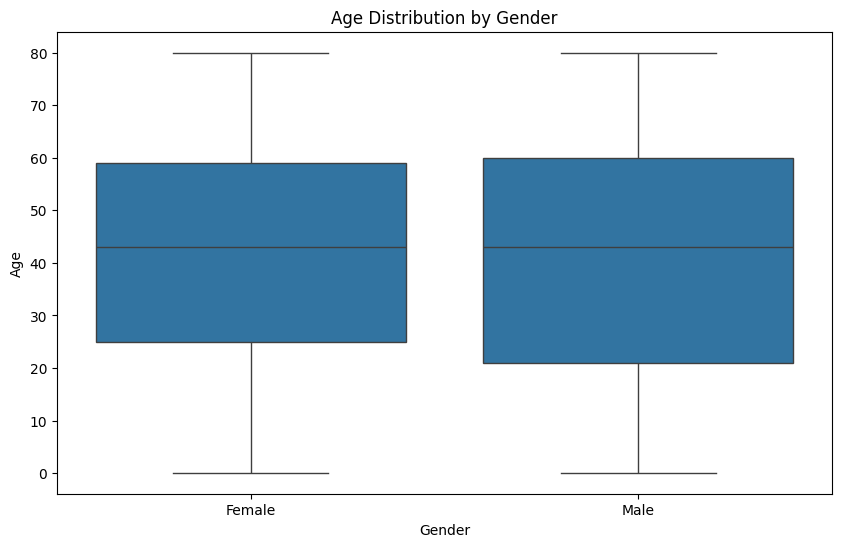

In [ ]:
# Age Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

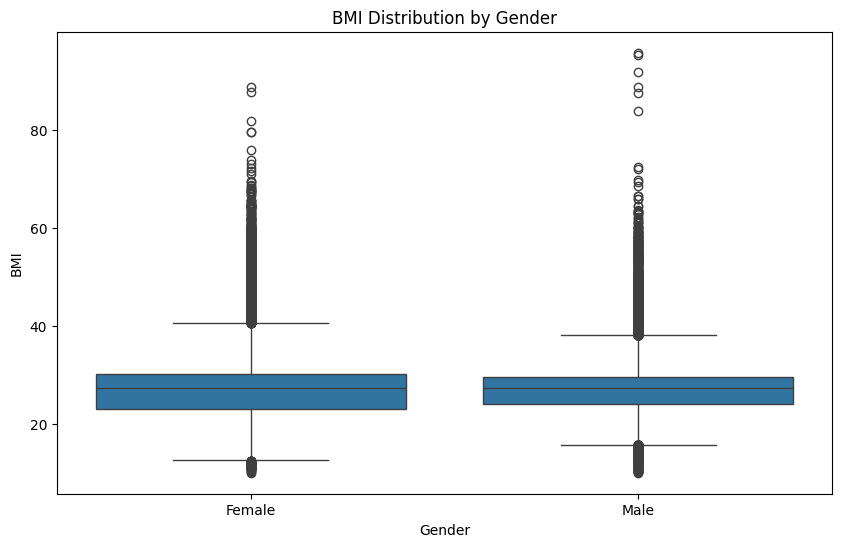

In [ ]:
# BMI Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

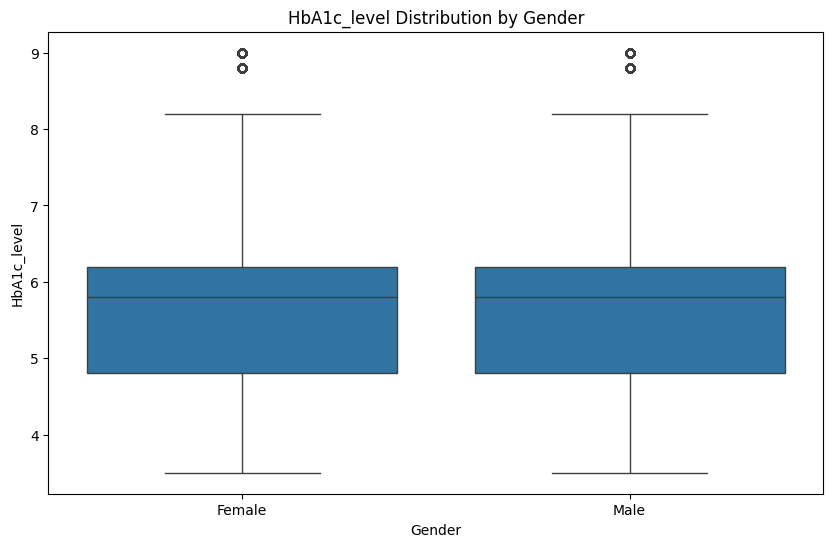

In [ ]:
# HbA1c_level Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c_level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('HbA1c_level')
plt.show()

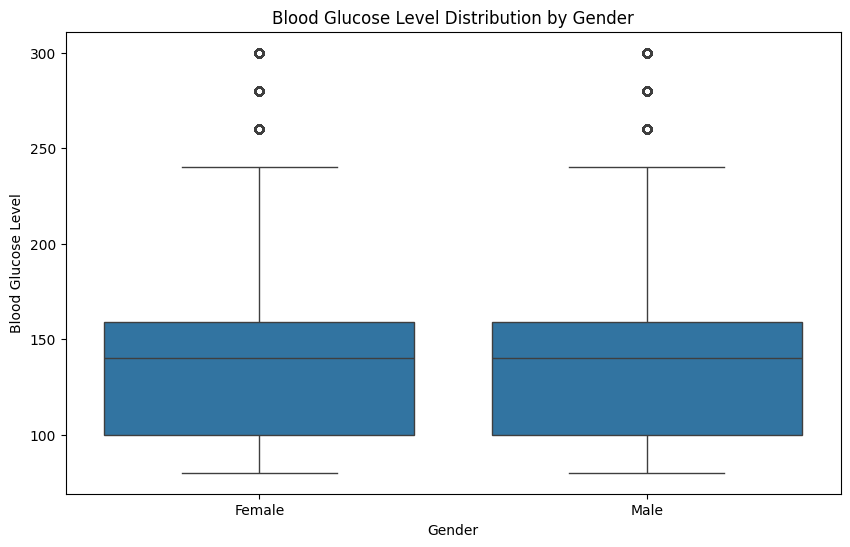

In [ ]:
# blood_glucose_level Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Glucose Level')
plt.show()

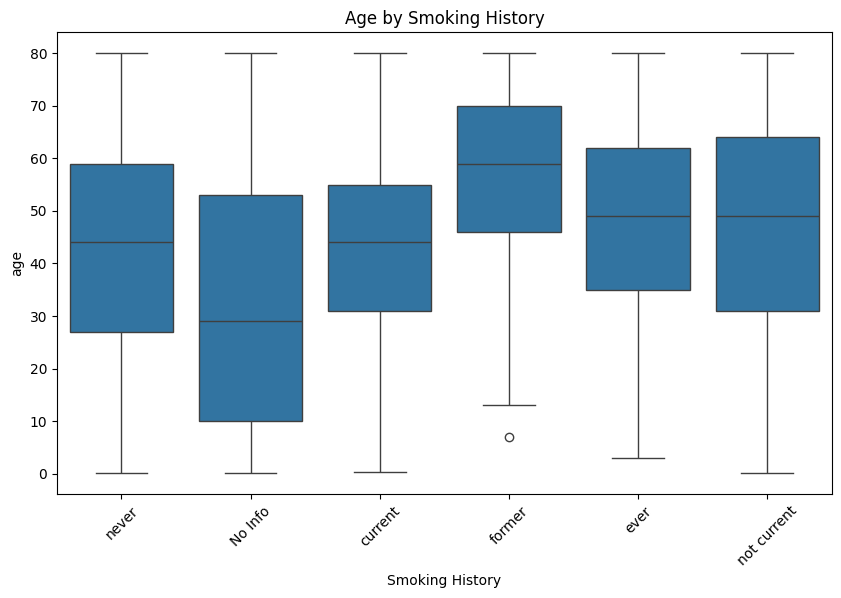

In [ ]:
# age by smoking history

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df)
plt.title('Age by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.show()

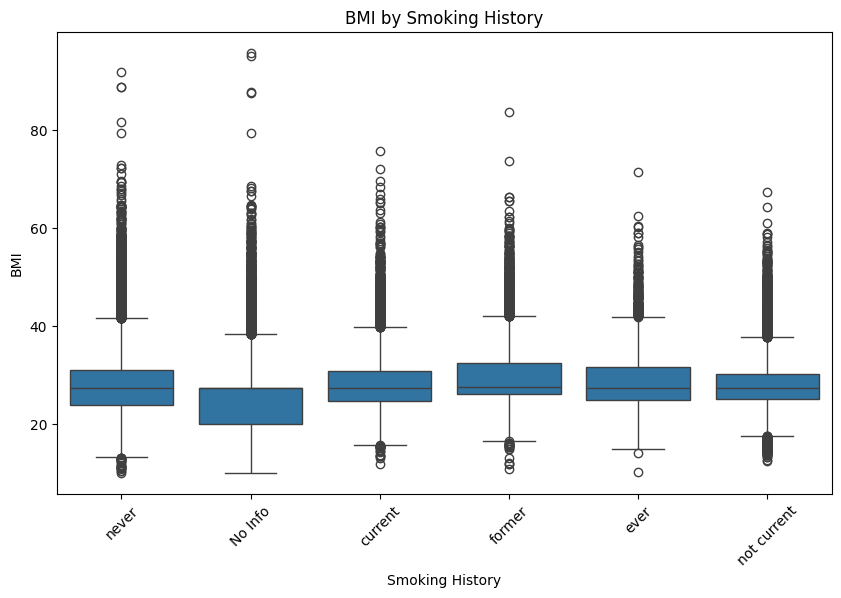

In [ ]:
# BMI by Smoking History

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='bmi', data=df)
plt.title('BMI by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

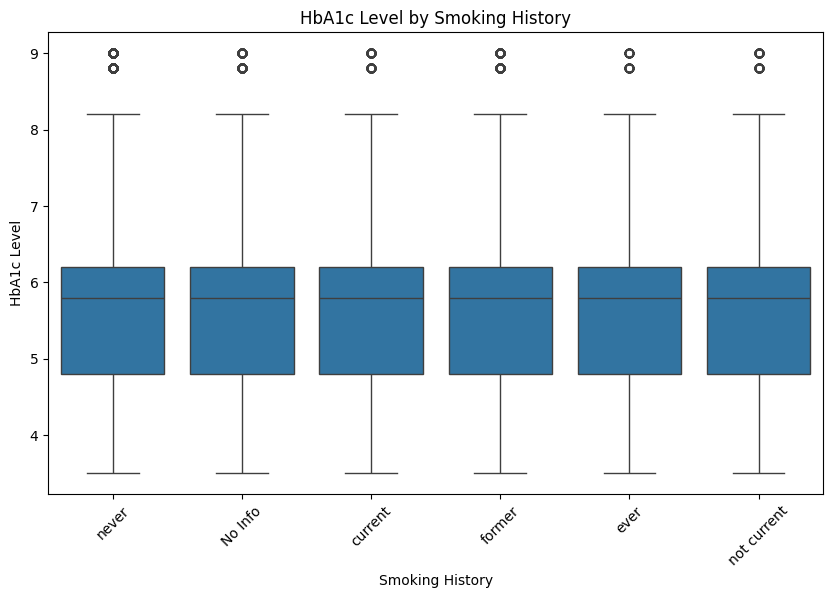

In [ ]:
# HbA1c Level by Smoking History

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='HbA1c_level', data=df)
plt.title('HbA1c Level by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('HbA1c Level')
plt.xticks(rotation=45)
plt.show()

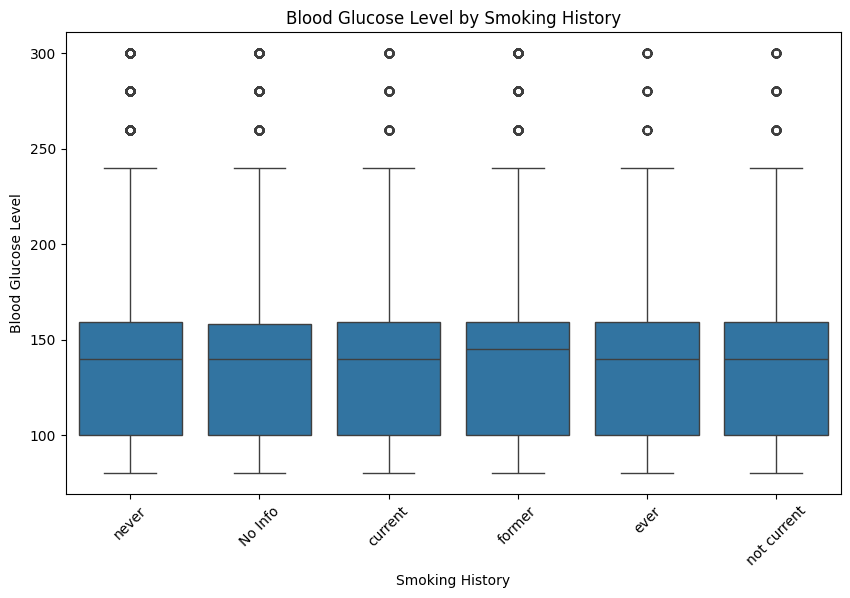

In [ ]:
# Blood Glucose Level by Smoking History

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Blood Glucose Level')
plt.xticks(rotation=45)
plt.show()

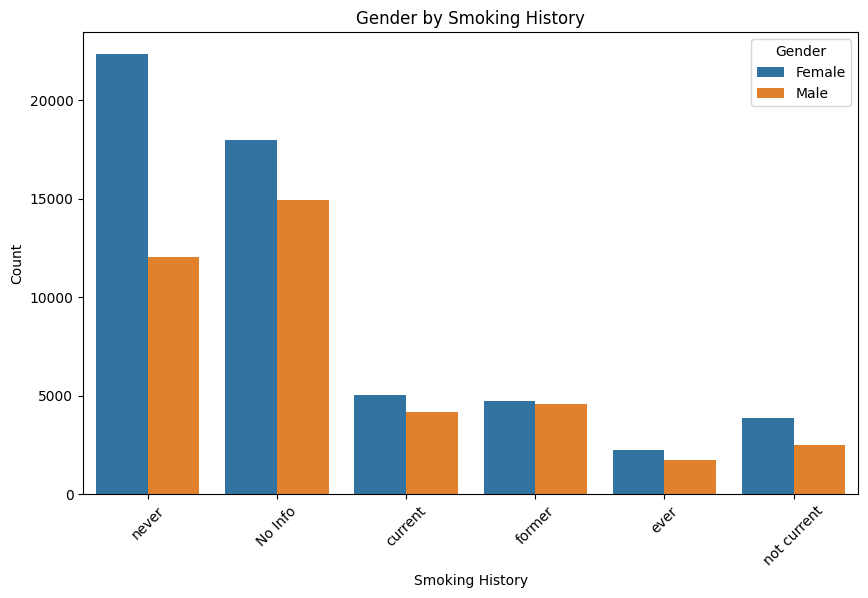

In [ ]:
# Gender by Smoking History

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='gender', data=df)
plt.title('Gender by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
new_df = df[selected_columns].copy()
new_df['diabetes'] = df['diabetes']
corr_matrix = new_df.corr()
corr_matrix['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.424366
HbA1c_level            0.406446
age                    0.264918
bmi                    0.214951
hypertension           0.195696
heart_disease          0.170701
Name: diabetes, dtype: float64

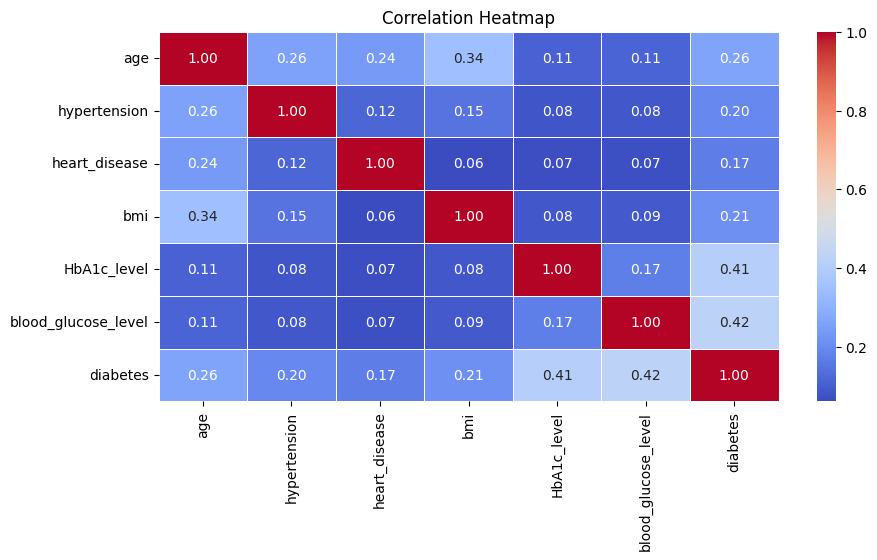

In [ ]:

corr_matrix = df.corr(numeric_only=True)

plt.figure().set_figwidth(10,8)
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Convert 'gender' column to binary (0, 1) using lambda function

df['gender'] = df['gender'].map(lambda x: 0 if x == 'Female' else 1)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# Define a function to convert smoking history to binary format

def convert_smoking_history(value):
    if value in ['current', 'ever', 'former']:
        return 1  # Smoker
    elif value in ['never', 'No Info', 'not current']:
        return 0  # Non-smoker
    else:
        return None

# Apply the function to the smoking_history column
df['smoking_history'] = df['smoking_history'].apply(convert_smoking_history)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
# Split data into features and target

x = df.drop('diabetes', axis=1)
y = df['diabetes']

print('Features', x,'\n')
print('Target', y)

Features        gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                0  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                0  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                1  27.83   
99998       0  24.0             0              0                0  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  

In [ ]:
# Since we have imbalanced data, we chose to apply the SMOTE algorithm.
# Reference : https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

print('Count before over-sampling', Counter(y))
print('Count after over-sampling', Counter(y_smote))

Count before over-sampling Counter({0: 87646, 1: 8482})
Count after over-sampling Counter({0: 87646, 1: 87646})


In [ ]:
# Split the data into training and test datasets

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

print('The x_train shape', x_train.shape)
print('The x_test shape',x_test.shape)
print('The y_train shape',y_train.shape)
print('The y_test shape',y_test.shape)


The x_train shape (140233, 8)
The x_test shape (35059, 8)
The y_train shape (140233,)
The y_test shape (35059,)
